# Solution path for a toy example

In [58]:
import sys
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../..')
from modules import full_path, path_solver

In [59]:
# Setting
X=np.array([[2,1,0],[1,2,1]], dtype=float)
Lambda = np.array([6,4,2], dtype=float)
y = np.array([15,5], dtype=float)

In [60]:
# for Numba compilation
_ = full_path(X, y , Lambda, ratio=0., k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)
_ = path_solver(X, y, Lambda, k_max=0., rtol_pattern=1e-6, atol_pattern = 1e-6, rtol_gamma=1e-6, split_max=1e1, log=0)

In [61]:
# Full path
Gamma, Sol, Primal, Gap, M, Split, T = full_path(X, y , Lambda, ratio=1., k_max=1e3, rtol_pattern=1e-6, atol_pattern = 1e-8, rtol_gamma=1e-12, split_max=1e1, log=1)

node 0: gamma = 6.000, 1.83e-05s elapsed, gap = 0.00e+00
node 1: gamma = 5.000, 8.95e-05s elapsed, gap = -1.42e-14
node 2: gamma = 3.750, 1.21e-04s elapsed, gap = -1.42e-14
node 3: gamma = 0.417, 1.46e-04s elapsed, gap = -1.42e-14
node 4: gamma = 0.000, 1.66e-04s elapsed, gap = 0.00e+00


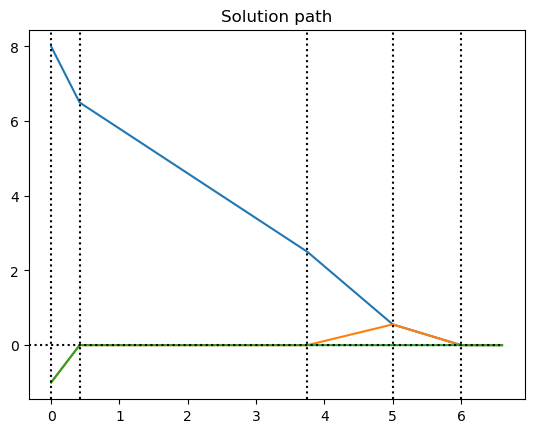

In [62]:
# Solution path
fig, ax = plt.subplots()
ax.plot([1.1*Gamma[0]] + Gamma, [Sol[0]] + Sol)
for gamma in Gamma:
    ax.axvline(gamma, color='k', linestyle=':')
ax.axhline(0, color='k', linestyle=':', xmax=0.95)
ax.set_title('Solution path')
plt.show() 

In [63]:
# Full path with ridge regularization
eps = np.sqrt(2e-4)
Gamma2, Sol2, Primal2, Gap2, M2, Split2, T2 = full_path(np.concatenate((X, eps*np.eye(X.shape[-1]))), np.concatenate((y, np.zeros(X.shape[-1]))) , Lambda, ratio=1., k_max=1e3, rtol_pattern=1e-6, atol_pattern = 1e-8, rtol_gamma=1e-12, split_max=1e1, log=1)
print(f'\nwith no ridge regularization: Gamma = {np.array(Gamma)}\n')
print(f'with ridge regularization: Gamma = {np.array(Gamma2)}')


node 0: gamma = 6.000, 1.78e-05s elapsed, gap = 0.00e+00
node 1: gamma = 5.000, 9.42e-05s elapsed, gap = -4.26e-14
node 2: gamma = 3.749, 1.28e-04s elapsed, gap = -1.42e-14
node 3: gamma = 0.417, 1.54e-04s elapsed, gap = -7.11e-15
node 4: gamma = 0.001, 1.81e-04s elapsed, gap = -4.35e-14
node 5: gamma = 0.000, 2.05e-04s elapsed, gap = -2.06e-14
node 6: gamma = 0.000, 2.33e-04s elapsed, gap = -1.61e-14
node 7: gamma = 0.000, 2.55e-04s elapsed, gap = -5.46e-14

with no ridge regularization: Gamma = [6.         5.         3.75       0.41666667 0.        ]

with ridge regularization: Gamma = [6.00000000e+00 5.00000000e+00 3.74949990e+00 4.16558335e-01
 6.99884027e-04 2.50350498e-07 5.00020005e-08 0.00000000e+00]


In [68]:
# Solver 
gamma = 3.
sol, (primal, gap) = path_solver(X, y , gamma*Lambda, k_max=1e3, rtol_pattern=1e-6, atol_pattern = 1e-8, rtol_gamma=1e-12, split_max=1e1, log=0)
print(f'solution for gamma = {gamma}: {sol}')

solution for gamma = 3.0: [3.4 0.  0. ]
